# Proyecto Final

## Curso: Aprendizaje Automático - Ciencia de Datos

## Prof. Dr.Ing. Felipe Meza-Obando

### Estudiantes

   - Roberto Baltodano

   - Sergio Blanco


## Parte 1 - Seleccion del dataset
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

### Descripcion del conjunto de datos:
Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial, cobrándose aproximadamente 17,9 millones de vidas al año, lo que representa el 31 % de todas las muertes en el mundo. Cuatro de cada cinco muertes por ECV se deben a infartos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca es una complicación frecuente causada por las ECV, y este conjunto de datos contiene 11 características que pueden utilizarse para predecir una posible cardiopatía.

Las personas con enfermedades cardiovasculares o que presentan un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o una enfermedad ya establecida) necesitan una detección y un tratamiento tempranos, en los que un modelo de aprendizaje automático puede ser de gran ayuda.


1. Age: edad del paciente [años]
1. Sex: sexo del paciente [M: Masculino, F: Femenino]
1. ChestPainType: tipo de dolor torácico [TA: Angina típica, ATA: Angina atípica, NAP: Dolor no anginoso, ASY: Asintomático]
1. RestingBP: presión arterial en reposo [mm Hg]
1. Cholesterol: colesterol sérico [mm/dl]
1. FastingBS: glucemia en ayunas [1: si Glucemia en ayunas > 120 mg/dl, 0: en caso contrario]
1. RestingECG:  resultados del electrocardiograma en reposo [Normal: Normal, ST: presenta anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del segmento ST > 0,05 mV), HVI: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes]
1. MaxHR:  cardíaca máxima alcanzada [Valor numérico entre 60 y 202]
1. ExerciseAngina: angina inducida por el ejercicio [S: Sí, N: No]
1. Oldpeak: oldpeak = ST [Valor numérico medido en depresión]
1. ST_Slope: la pendiente del segmento ST de máximo ejercicio [Arriba: pendiente ascendente, Plano: plano, Abajo: pendiente descendente]
1. **HeartDisease**: clase de salida [1: enfermedad cardíaca, 0: normal]

Fuente
Este conjunto de datos se creó combinando diferentes conjuntos de datos que ya estaban disponibles de forma independiente, pero que no se habían combinado previamente. En él, se combinan cinco conjuntos de datos cardíacos basados ​​en once características comunes, lo que lo convierte en el mayor conjunto de datos sobre enfermedades cardíacas disponible hasta la fecha para fines de investigación. Los cinco conjuntos de datos utilizados para su creación son:

Cleveland: 303 observaciones
Húngaro: 294 observaciones
Suiza: 123 observaciones
Long Beach, Virginia: 200 observaciones
Conjunto de datos Stalog (Corazón): 270 observaciones
Total: 1190 observaciones
Duplicadas: 272 observaciones

Final dataset: 918 observations

Todos los conjuntos de datos utilizados se pueden encontrar en el Índice de conjuntos de datos de enfermedades cardíacas del Repositorio de Aprendizaje Automático de la UCI en el siguiente enlace: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Citación

fedesoriano. (Septiembre de 2021). Conjunto de datos de predicción de insuficiencia cardíaca. Recuperado [Fecha de recuperación] de https://www.kaggle.com/fedesoriano/heart-failure-prediction .

Expresiones de gratitud
Creadores:

Instituto Húngaro de Cardiología. Budapest: András Janosi, MD

Hospital Universitario de Zúrich, Suiza: William Steinbrunn, MD

Hospital Universitario, Basilea, Suiza: Matthias Pfisterer, MD

Centro Médico de Veteranos de Long Beach y Fundación Clínica Cleveland: Robert Detrano, MD, Ph.D.

### Donante:

   David W. Aha (aha '@' ics.uci.edu) (714) 856-8779




In [15]:
import os

# Importación del dataset - Cargando datasets separados para incluir información de color
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB # Modelos de Probabilidad y Bayes
from sklearn.tree import DecisionTreeClassifier
# IMPORTACIÓN CLAVE: accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
import warnings


import kagglehub


# 1. Descargar el dataset (devuelve la ruta al directorio)
path_to_dir = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset directory:", path_to_dir)

# 2. ENCONTRAR EL NOMBRE DEL ARCHIVO DE DATOS DENTRO DEL DIRECTORIO
# El archivo principal en este dataset es 'heart.csv'
file_name = "heart.csv" 

# 3. CONSTRUIR LA RUTA COMPLETA AL ARCHIVO CSV
file_path_full = os.path.join(path_to_dir, file_name)

# --- Verificar que el archivo existe (Opcional, pero recomendado) ---
if not os.path.exists(file_path_full):
    print(f"Error: No se encontró el archivo {file_name} en la ruta {path_to_dir}. Verifique el contenido del directorio de descarga.")
else:
    print(f"Ruta de archivo CSV construida: {file_path_full}")
    
    # 4. Cargar el dataset (Usando pd.read_csv directamente o la alternativa de load_dataset)
    # Como alternativa simple a load_dataset (que está deprecated), use pd.read_csv:
    df = pd.read_csv(file_path_full)
    
    # El código original (ajustado para usar la ruta completa):
    # df = kagglehub.load_dataset(
    #     kagglehub.KaggleDatasetAdapter.PANDAS,
    #     "fedesoriano/heart-failure-prediction",
    #     file_path_full, # <--- RUTA COMPLETA CORREGIDA
    # )

print(df.info())
print('-'*50)
print(df.describe())


Path to dataset directory: /home/sblanco/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1
Ruta de archivo CSV construida: /home/sblanco/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1/heart.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), 

## Parte 2 - Trabajo de Preprocesamiento

Para cada columna se estará analizando con el fin de aplicar técnicas de preprocesamiento si ameritan.

De la misma forma se estará realizando el Análisis Exploratorio de Datos generando gráficos de análisis en cada una de las librerías indicadas: Matplotlib, Seaborn

De igual manera se estará manejando el análisis con el uso de Pandas y Polars.

### Trabajo para la Columna HeartDisease (Variable Target)

Se procederá a analizar el estado del atributo HeartDisease generando la siguiente información.

In [16]:
# Análisis de la columna HeartDisease
nan_count_quality = df['HeartDisease'].isna().sum()
print(f"Cantidad total de líneas: {len(df)}")
print(f"Cantidad de valores NaN en la columna 'HeartDisease': {nan_count_quality}")
print(f"Cantidad de valores en la columna 'HeartDisease': {len(df) - nan_count_quality}")
print(f"Porcentaje de valores NaN en la columna 'HeartDisease': {nan_count_quality / len(df) * 100:.4f}%")

# Distribución de valores únicos
print("\nDistribución de valores de HeartDisease:")
print(df['HeartDisease'].value_counts().sort_index())

Cantidad total de líneas: 918
Cantidad de valores NaN en la columna 'HeartDisease': 0
Cantidad de valores en la columna 'HeartDisease': 918
Porcentaje de valores NaN en la columna 'HeartDisease': 0.0000%

Distribución de valores de HeartDisease:
HeartDisease
0    410
1    508
Name: count, dtype: int64


### Gráfico de HeartDisease

**Utilizando matplotlib**

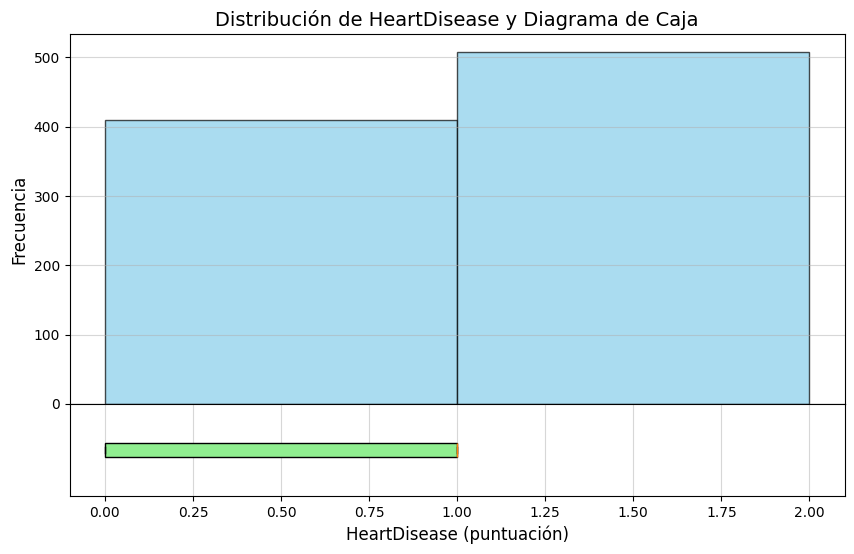

In [17]:
fig, (ax_hist, ax_box) = plt.subplots(
    2, 1,
    sharex=True,
    figsize=(10, 6),
    gridspec_kw={'height_ratios': [4, 1]}
)

fig.subplots_adjust(hspace=0)

# Histograma de QUALITY (Superior)
ax_hist.hist(
    df['HeartDisease'].dropna(),
    bins=range(int(df['HeartDisease'].min()), int(df['HeartDisease'].max()) + 2),
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)
ax_hist.set_title('Distribución de HeartDisease y Diagrama de Caja', fontsize=14)
ax_hist.set_ylabel('Frecuencia', fontsize=12)
ax_hist.grid(axis='y', alpha=0.5)
ax_hist.tick_params(axis="x", labelbottom=False)

# Box Plot de QUALITY (Inferior)
ax_box.boxplot(
    df['HeartDisease'].dropna(),
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', color='black'),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='red', alpha=0.5)
)
ax_box.set_xlabel('HeartDisease (puntuación)', fontsize=12)
ax_box.set_yticks([])
ax_box.grid(axis='x', alpha=0.5)

plt.show()


**Usando SEABORN**

### Trabajo para la Columna ALCOHOL

Se procederá a analizar el estado del atributo ALCOHOL generando la siguiente información.

#### Con Pandas

In [18]:
wine_data['alcohol'] = pd.to_numeric(wine_data['alcohol'], errors='coerce')
nan_count_alcohol = wine_data['alcohol'].isna().sum()
print(f"Cantidad total de líneas: {len(wine_data)}")
print(f"Cantidad de valores NaN en la columna 'ALCOHOL': {nan_count_alcohol}")
print(f"Cantidad de valores en la columna 'ALCOHOL': {len(wine_data) - nan_count_alcohol}")
print(f"Porcentaje de valores NaN en la columna 'ALCOHOL': {nan_count_alcohol / len(wine_data) * 100:.4f}%")
print(f"Valor máximo: {wine_data['alcohol'].max():.2f}")
print(f"Valor mínimo: {wine_data['alcohol'].min():.2f}")
print(f"Media del ALCOHOL: {wine_data['alcohol'].mean():.2f}")
print(f"Mediana del ALCOHOL: {wine_data['alcohol'].median():.2f}")
print(f"Moda del ALCOHOL: {wine_data['alcohol'].mode()[0]:.2f}")
print(f"Desviación estándar del ALCOHOL: {wine_data['alcohol'].std():.2f}")
print(f"Percentil 25 del ALCOHOL: {wine_data['alcohol'].quantile(0.25):.2f}")
print(f"Percentil 75 del ALCOHOL: {wine_data['alcohol'].quantile(0.75):.2f}")

NameError: name 'wine_data' is not defined

#### Con Polars

In [ ]:
df_processed_alcohol = wine_data_pl.with_columns(
    pl.col('alcohol').cast(pl.Float64, strict=False).alias('ALCOHOL_NUMERIC')
)
alcohol_col = 'ALCOHOL_NUMERIC'

total_lines = df_processed_alcohol.height

stats_df_alcohol = df_processed_alcohol.select(
    nan_count = pl.col(alcohol_col).is_null().sum(),
    max_val = pl.col(alcohol_col).max(),
    min_val = pl.col(alcohol_col).min(),
    mean_val = pl.col(alcohol_col).mean(),
    median_val = pl.col(alcohol_col).median(),
    std_val = pl.col(alcohol_col).std(),
    p25_val = pl.col(alcohol_col).quantile(0.25),
    p75_val = pl.col(alcohol_col).quantile(0.75),
    mode_val = pl.col(alcohol_col).mode().first()
).row(0)

nan_count = stats_df_alcohol[0]
max_val = stats_df_alcohol[1]
min_val = stats_df_alcohol[2]
mean_val = stats_df_alcohol[3]
median_val = stats_df_alcohol[4]
std_val = stats_df_alcohol[5]
p25_val = stats_df_alcohol[6]
p75_val = stats_df_alcohol[7]
mode_val = stats_df_alcohol[8]

valid_count = total_lines - nan_count
nan_percentage = (nan_count / total_lines) * 100

print(f"Cantidad total de líneas: {total_lines}")
print(f"Cantidad de valores NaN en la columna 'ALCOHOL': {nan_count}")
print(f"Cantidad de valores en la columna 'ALCOHOL': {valid_count}")
print(f"Porcentaje de valores NaN en la columna 'ALCOHOL': {nan_percentage:.4f}%")
print(f"Valor máximo: {max_val:.2f}")
print(f"Valor mínimo: {min_val:.2f}")
print(f"Media del ALCOHOL: {mean_val:.2f}")
print(f"Mediana del ALCOHOL: {median_val:.2f}")
print(f"Moda del ALCOHOL: {mode_val:.2f}" if mode_val is not None else "Moda del ALCOHOL: N/A")
print(f"Desviación estándar del ALCOHOL: {std_val:.2f}")
print(f"Percentil 25 del ALCOHOL: {p25_val:.2f}")
print(f"Percentil 75 del ALCOHOL: {p75_val:.2f}")

Cantidad total de líneas: 6497
Cantidad de valores NaN en la columna 'ALCOHOL': 0
Cantidad de valores en la columna 'ALCOHOL': 6497
Porcentaje de valores NaN en la columna 'ALCOHOL': 0.0000%
Valor máximo: 14.90
Valor mínimo: 8.00
Media del ALCOHOL: 10.49
Mediana del ALCOHOL: 10.30
Moda del ALCOHOL: 9.50
Desviación estándar del ALCOHOL: 1.19
Percentil 25 del ALCOHOL: 9.50
Percentil 75 del ALCOHOL: 11.30


### Gráfico de Alcohol

**Utilizando matplotlib**

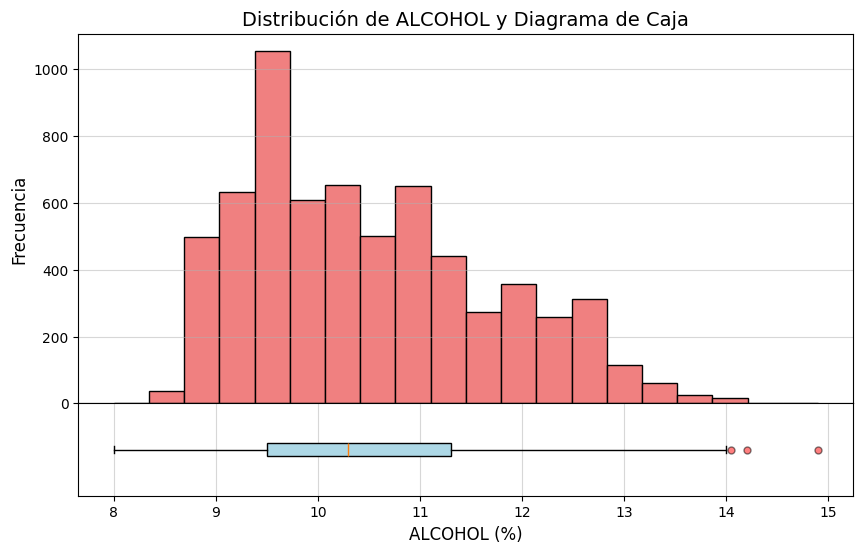

In [ ]:
fig, (ax_hist, ax_box) = plt.subplots(
    2, 1,
    sharex=True,
    figsize=(10, 6),
    gridspec_kw={'height_ratios': [4, 1]}
)

fig.subplots_adjust(hspace=0)

# Histograma de ALCOHOL (Superior)
ax_hist.hist(
    wine_data['alcohol'].dropna(),
    bins=20,
    color='lightcoral',
    edgecolor='black'
)
ax_hist.set_title('Distribución de ALCOHOL y Diagrama de Caja', fontsize=14)
ax_hist.set_ylabel('Frecuencia', fontsize=12)
ax_hist.grid(axis='y', alpha=0.5)
ax_hist.tick_params(axis="x", labelbottom=False)

# Box Plot de ALCOHOL (Inferior)
ax_box.boxplot(
    wine_data['alcohol'].dropna(),
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='red', alpha=0.5)
)
ax_box.set_xlabel('ALCOHOL (%)', fontsize=12)
ax_box.set_yticks([])
ax_box.grid(axis='x', alpha=0.5)

plt.show()

## Análisis de la variables categóricas 

Las variables categóricas a trabajar son: 

1. Age
1. Sex
1. ChestPainType
1. RestingECG
1. ExerciseAngina
1. ST_Slope


### Trabajo para la Columna Age (edad)


=== ANÁLISIS DE LA VARIABLE Age ===
Cantidad total de líneas: 918
Cantidad de valores NaN en la columna 'Age': 0
Cantidad de valores en la columna 'Age': 918
Porcentaje de valores NaN en la columna 'Age': 0.0000%

Distribución de colores:
Age
54    51
58    42
55    41
56    38
57    38
52    36
62    35
59    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
40    13
69    13
66    13
37    11
35    11
68    10
74     7
70     7
34     7
36     6
32     5
71     5
72     4
75     3
29     3
31     2
33     2
77     2
76     2
30     1
28     1
73     1
Name: count, dtype: int64

Porcentajes por Age:
54: 5.56%
58: 4.58%
55: 4.47%
56: 4.14%
57: 4.14%
52: 3.92%
62: 3.81%
59: 3.81%
51: 3.81%
53: 3.59%
60: 3.49%
48: 3.38%
61: 3.38%
63: 3.27%
50: 2.72%
41: 2.61%
43: 2.61%
46: 2.61%
64: 2.40%
49: 2.29%
65: 2.29%
47: 2.07%
44: 2.07%
45: 1.96%
42: 1.96%
38: 1.74%

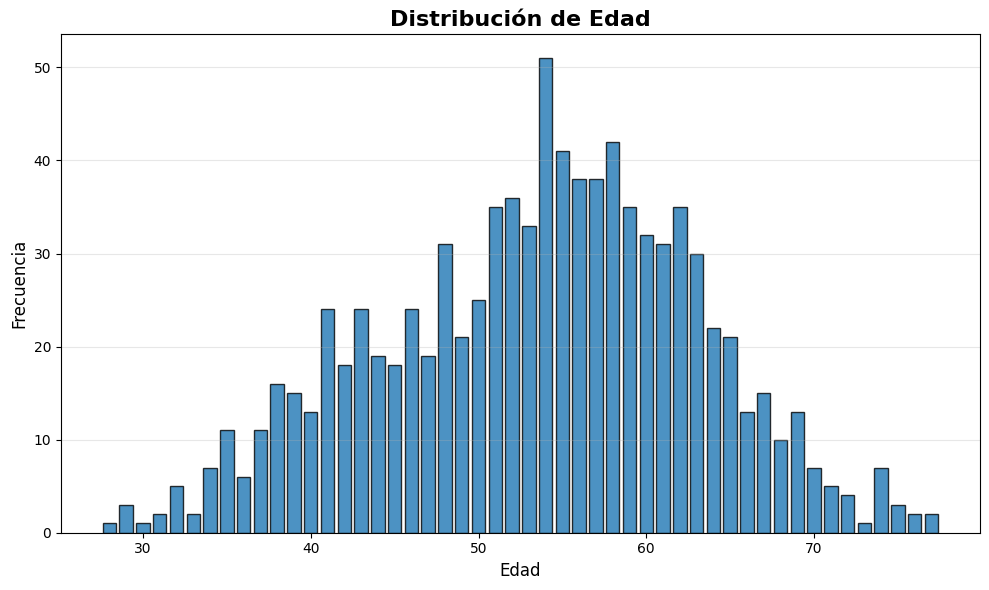

In [ ]:

print("=== ANÁLISIS DE LA VARIABLE Age ===")

# Verificar valores nulos
nan_count_color = df['Age'].isna().sum()
print(f"Cantidad total de líneas: {len(df)}")
print(f"Cantidad de valores NaN en la columna 'Age': {nan_count_color}")
print(f"Cantidad de valores en la columna 'Age': {len(df) - nan_count_color}")
print(f"Porcentaje de valores NaN en la columna 'Age': {nan_count_color / len(df) * 100:.4f}%")

# Distribución de edades
print("\nDistribución de edades:")
edad_counts = df['Age'].value_counts()
print(edad_counts)

# Porcentajes
print("\nPorcentajes por Age:")
age_percentages = df['Age'].value_counts(normalize=True) * 100
for edad, percentage in age_percentages.items():
    print(f"{edad}: {percentage:.2f}%")

# Gráfico de barras para edad
plt.figure(figsize=(10, 6))
bars = plt.bar(
    edad_counts.index,
    edad_counts.values,
    edgecolor='black',
    alpha=0.8
)

plt.title('Distribución de Edad', fontsize=16, fontweight='bold')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()


## Trabajo para la Columna Sex (sexo)

=== ANÁLISIS DE LA VARIABLE Sex ===
Cantidad total de líneas: 918
Cantidad de valores NaN en la columna 'Sex': 0
Cantidad de valores en la columna 'Sex': 918
Porcentaje de valores NaN en la columna 'Sex': 0.0000%

Distribución de sexo:
Sex
M    725
F    193
Name: count, dtype: int64

Porcentajes por Sex:
M: 78.98%
F: 21.02%


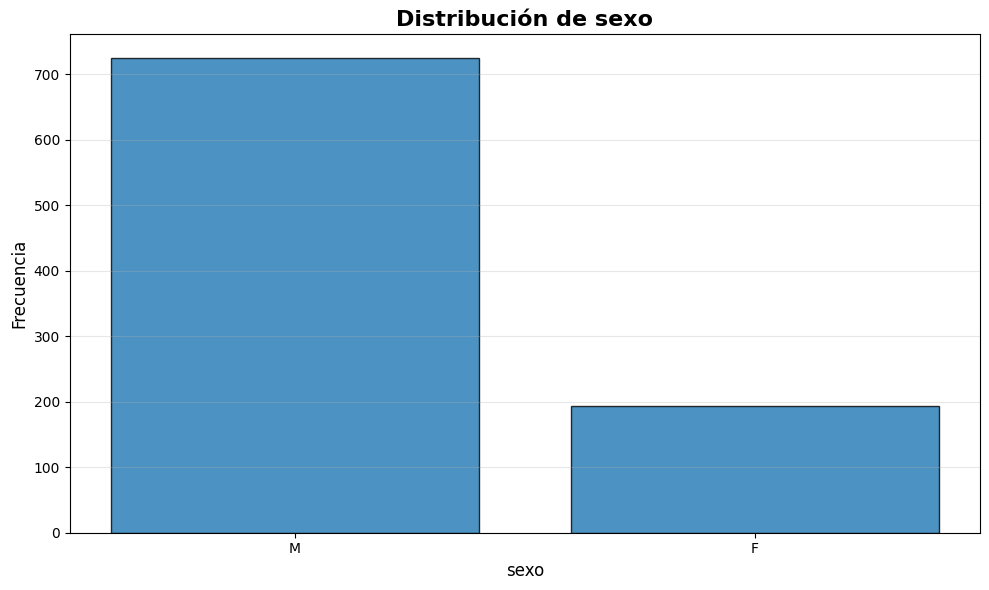

In [ ]:

print("=== ANÁLISIS DE LA VARIABLE Sex ===")

# Verificar valores nulos
nan_count_color = df['Sex'].isna().sum()
print(f"Cantidad total de líneas: {len(df)}")
print(f"Cantidad de valores NaN en la columna 'Sex': {nan_count_color}")
print(f"Cantidad de valores en la columna 'Sex': {len(df) - nan_count_color}")
print(f"Porcentaje de valores NaN en la columna 'Sex': {nan_count_color / len(df) * 100:.4f}%")

# Distribución de sexo
print("\nDistribución de sexo:")
sex_counts = df['Sex'].value_counts()
print(sex_counts)

# Porcentajes
print("\nPorcentajes por Sex:")
sex_percentages = df['Sex'].value_counts(normalize=True) * 100
for sexo, percentage in sex_percentages.items():
    print(f"{sexo}: {percentage:.2f}%")

# Gráfico de barras para Sexo
plt.figure(figsize=(10, 6))
bars = plt.bar(
    sex_counts.index,
    sex_counts.values,
#    color=['darkred', 'lightgoldenrodyellow'],
    edgecolor='black',
    alpha=0.8
)

plt.title('Distribución de sexo', fontsize=16, fontweight='bold')
plt.xlabel('sexo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)

    

plt.tight_layout()
plt.show()

## Trabajo para la Columna ChestPainType 

=== ANÁLISIS DE LA VARIABLE ChestPainType ===
Cantidad total de líneas: 918
Cantidad de valores NaN en la columna 'ChestPainType': 0
Cantidad de valores en la columna 'ChestPainType': 918
Porcentaje de valores NaN en la columna 'ChestPainType': 0.0000%

Distribución de ChestPainType:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Porcentajes por ChestPainType:
ASY: 54.03%
NAP: 22.11%
ATA: 18.85%
TA: 5.01%


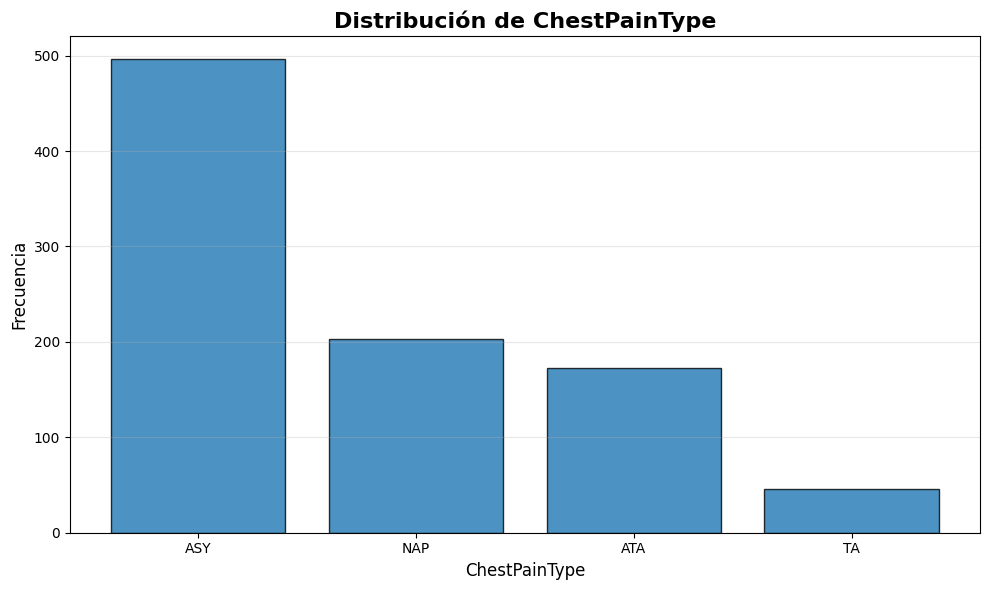

In [ ]:
print("=== ANÁLISIS DE LA VARIABLE ChestPainType ===")

# Verificar valores nulos
nan_count_color = df['ChestPainType'].isna().sum()
print(f"Cantidad total de líneas: {len(df)}")
print(f"Cantidad de valores NaN en la columna 'ChestPainType': {nan_count_color}")
print(f"Cantidad de valores en la columna 'ChestPainType': {len(df) - nan_count_color}")
print(f"Porcentaje de valores NaN en la columna 'ChestPainType': {nan_count_color / len(df) * 100:.4f}%")

# Distribución de edades
print("\nDistribución de ChestPainType:")
chestPainType_counts = df['ChestPainType'].value_counts()
print(chestPainType_counts)

# Porcentajes
print("\nPorcentajes por ChestPainType:")
chestPainType_percentages = df['ChestPainType'].value_counts(normalize=True) * 100
for chestPainType, percentage in chestPainType_percentages.items():
    print(f"{chestPainType}: {percentage:.2f}%")

# Gráfico de barras para chestPainType
plt.figure(figsize=(10, 6))
bars = plt.bar(
    chestPainType_counts.index,
    chestPainType_counts.values,
    edgecolor='black',
    alpha=0.8
)

plt.title('Distribución de ChestPainType', fontsize=16, fontweight='bold')
plt.xlabel('ChestPainType', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)
   

plt.tight_layout()
plt.show()

## Trabajo para la Columna RestingECG 

=== ANÁLISIS DE LA VARIABLE RestingECG ===
Cantidad total de líneas: 918
Cantidad de valores NaN en la columna 'RestingECG': 0
Cantidad de valores en la columna 'RestingECG': 918
Porcentaje de valores NaN en la columna 'RestingECG': 0.0000%

Distribución de RestingECG:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Porcentajes por RestingECG:
Normal: 60.13%
LVH: 20.48%
ST: 19.39%


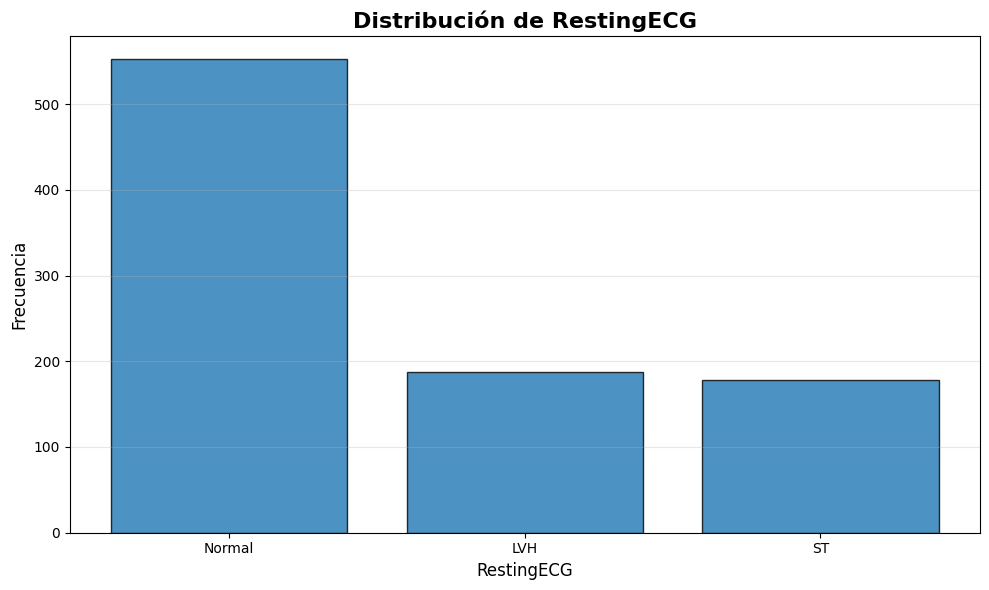

In [ ]:

print("=== ANÁLISIS DE LA VARIABLE RestingECG ===")

# Verificar valores nulos
nan_count_color = df['RestingECG'].isna().sum()
print(f"Cantidad total de líneas: {len(df)}")
print(f"Cantidad de valores NaN en la columna 'RestingECG': {nan_count_color}")
print(f"Cantidad de valores en la columna 'RestingECG': {len(df) - nan_count_color}")
print(f"Porcentaje de valores NaN en la columna 'RestingECG': {nan_count_color / len(df) * 100:.4f}%")

# Distribución de RestingECG
print("\nDistribución de RestingECG:")
restingECG_counts = df['RestingECG'].value_counts()
print(str(restingECG_counts))

# Porcentajes
print("\nPorcentajes por RestingECG:")
chestPainType_percentages = df['RestingECG'].value_counts(normalize=True) * 100
for restingECG, percentage in chestPainType_percentages.items():
    print(f"{restingECG}: {percentage:.2f}%")

# Gráfico de barras para RestingECG
plt.figure(figsize=(10, 6))
bars = plt.bar(
    restingECG_counts.index,
    restingECG_counts.values,
    edgecolor='black',
    alpha=0.8
)

plt.title('Distribución de RestingECG', fontsize=16, fontweight='bold')
plt.xlabel('RestingECG', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)
   

plt.tight_layout()
plt.show()


## Trabajo para la Columna ExerciseAngina




=== ANÁLISIS DE LA VARIABLE ExerciseAngina ===
Cantidad total de líneas: 918
Cantidad de valores NaN en la columna 'ExerciseAngina': 0
Cantidad de valores en la columna 'ExerciseAngina': 918
Porcentaje de valores NaN en la columna 'ExerciseAngina': 0.0000%

Distribución de ExerciseAngina:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Porcentajes por ExerciseAngina:
Normal: 60.13%
LVH: 20.48%
ST: 19.39%


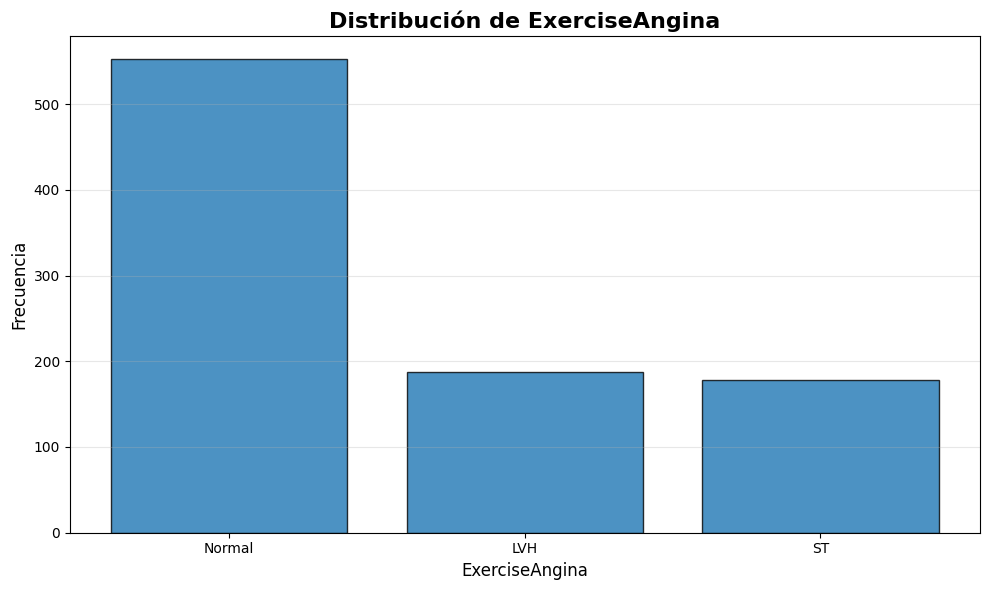

In [ ]:

print("=== ANÁLISIS DE LA VARIABLE ExerciseAngina ===")

# Verificar valores nulos
nan_count_color = df['ExerciseAngina'].isna().sum()
print(f"Cantidad total de líneas: {len(df)}")
print(f"Cantidad de valores NaN en la columna 'ExerciseAngina': {nan_count_color}")
print(f"Cantidad de valores en la columna 'ExerciseAngina': {len(df) - nan_count_color}")
print(f"Porcentaje de valores NaN en la columna 'ExerciseAngina': {nan_count_color / len(df) * 100:.4f}%")

# Distribución de RestingECG
print("\nDistribución de ExerciseAngina:")
exerciseAngina_counts = df['ExerciseAngina'].value_counts()
print(str(exerciseAngina_counts))

# Porcentajes
print("\nPorcentajes por ExerciseAngina:")
exerciseAngina_percentages = df['ExerciseAngina'].value_counts(normalize=True) * 100
for restingECG, percentage in chestPainType_percentages.items():
    print(f"{restingECG}: {percentage:.2f}%")

# Gráfico de barras para RestingECG
plt.figure(figsize=(10, 6))
bars = plt.bar(
    restingECG_counts.index,
    restingECG_counts.values,
    edgecolor='black',
    alpha=0.8
)

plt.title('Distribución de ExerciseAngina', fontsize=16, fontweight='bold')
plt.xlabel('ExerciseAngina', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)
   

plt.tight_layout()
plt.show()

## Trabajo para la Columna ST_Slope

=== ANÁLISIS DE LA VARIABLE ST_Slope ===
Cantidad total de líneas: 918
Cantidad de valores NaN en la columna 'ST_Slope': 0
Cantidad de valores en la columna 'ST_Slope': 918
Porcentaje de valores NaN en la columna 'ST_Slope': 0.0000%

Distribución de ST_Slope:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

Porcentajes por ST_Slope:
Flat: 50.11%
Up: 43.03%
Down: 6.86%


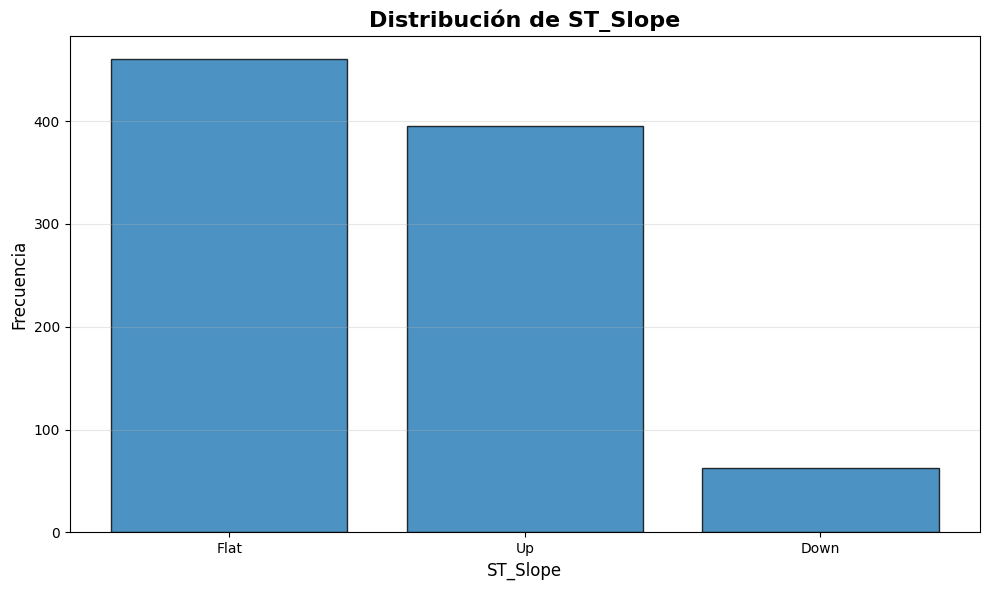

In [ ]:

print("=== ANÁLISIS DE LA VARIABLE ST_Slope ===")

# Verificar valores nulos
nan_count_color = df['ST_Slope'].isna().sum()
print(f"Cantidad total de líneas: {len(df)}")
print(f"Cantidad de valores NaN en la columna 'ST_Slope': {nan_count_color}")
print(f"Cantidad de valores en la columna 'ST_Slope': {len(df) - nan_count_color}")
print(f"Porcentaje de valores NaN en la columna 'ST_Slope': {nan_count_color / len(df) * 100:.4f}%")

# Distribución de ST_Slope
print("\nDistribución de ST_Slope:")
sT_Slope_counts = df['ST_Slope'].value_counts()
print(str(sT_Slope_counts))

# Porcentajes
print("\nPorcentajes por ST_Slope:")
sT_Slope_percentages = df['ST_Slope'].value_counts(normalize=True) * 100
for sT_Slope, percentage in sT_Slope_percentages.items():
    print(f"{sT_Slope}: {percentage:.2f}%")

# Gráfico de barras para ST_Slope
plt.figure(figsize=(10, 6))
bars = plt.bar(
    sT_Slope_counts.index,
    sT_Slope_counts.values,
    edgecolor='black',
    alpha=0.8
)

plt.title('Distribución de ST_Slope', fontsize=16, fontweight='bold')
plt.xlabel('ST_Slope', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)
   

plt.tight_layout()
plt.show()

## Análisis de modelos. 

In [21]:
import warnings

# Suprimir advertencias
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)


class ClasificadorEstadistico:
    """
    Clase para manejar la carga de datos, el preprocesamiento,
    el entrenamiento y la evaluación de modelos de clasificación multiclase.
    """
    def __init__(self, filepath=''):
        self.scaler = StandardScaler()
        self.labels = None
        self.X_train_scaled = None
        self.X_test_scaled = None
        self.y_train = None
        self.y_test = None
        self.metric_results = {}
        self.filepath = filepath
        self.drop_first = True
        self._df = None
        self._random_state = 42
        
    def preproceso(self, target_col='', columns=[], sep=',', test_size=0.2, random_state=42):
        """Preprocesamiento del dataset y división en conjuntos de entrenamiento y prueba."""
        if not self.filepath:
            raise ValueError("No se estableció archivo a procesar.")
        self._random_state = random_state
        self._load_and_preprocess(self.filepath, target_col, columns, test_size, sep)
    
    def preproceso2(self, target_col='', columns=[], sep=',', test_size=0.2, random_state=42):
        """
        Se modifica para cargar la data de df.
        
        Preprocesamiento del dataset y división en conjuntos de entrenamiento y prueba."""
        if not self.filepath:
            raise ValueError("No se estableció archivo a procesar.")
        self._random_state = random_state
        self._load_and_preprocess2(df, target_col, columns, test_size, sep)
    
    def val_max_K(self):
        """Retorna el valor máximo de K (raíz cuadrada del número total de filas)."""
        if self._df is None:
                 raise ValueError("No se cargó el dataset.")    
        else:
            return int(np.sqrt(self._df.shape[0]))  



    def _load_and_preprocess2(self, df, target_col, columns, test_size, sep):
        """
            Carga el dataset desde la variable 'df' global
            del notebook y la preprocesa.
            
        """
        
        print("1. Cargando y Preprocesando Datos...")
        if not target_col:
            raise ValueError("El target no tiene la columna a evaluar.")
    
        self._df = df
        
        # One-Hot Encoding (los atributos pasados en la variable columns
        # a binario)
        df_encoded = self._one_hot_encode_column(columns, drop_first=True)
      
        # Separación de características y target
        X = df_encoded.drop(target_col, axis=1).values
        y = df_encoded[target_col].values.ravel()
        
        # División de datos
        X_train, X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=self._random_state 
        )
        
        # Escalado (fit solo en train, transform en train y test)
        self.X_train_scaled = self.scaler.fit_transform(X_train)
        self.X_test_scaled = self.scaler.transform(X_test)
        
        self.labels = np.unique(self.y_train)
        print(f"   Datos listos. Clases de calidad: {self.labels}")
        print("-" * 50)



        
    def _load_and_preprocess(self, filepath, target_col, columns, test_size, sep):
        """Carga un dataset desde un archivo CSV y preprocesa."""
        
        print("1. Cargando y Preprocesando Datos...")
        if not target_col:
            raise ValueError("El target no tiene la columna a evaluar.")
    
        self._df = pd.read_csv(filepath, sep=sep)
        
        # One-Hot Encoding (Convierte los atributos categoricos a binario)
        df_encoded = self._one_hot_encode_column(columns, drop_first=True)
      
        # Separación de características y target
        X = df_encoded.drop(target_col, axis=1).values
        y = df_encoded[target_col].values.ravel()
        
        # División de datos
        X_train, X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=self._random_state 
        )
        
        # Escalado (fit solo en train, transform en train y test)
        self.X_train_scaled = self.scaler.fit_transform(X_train)
        self.X_test_scaled = self.scaler.transform(X_test)
        
        self.labels = np.unique(self.y_train)
        print(f"   Datos listos. Clases de calidad: {self.labels}")
        print("-" * 50)


    def _calculate_metrics(self, y_true, y_pred):
        """
        Calcula Precision, Recall, F1-Score, Specificity y ACCURACY.
        """
        
        # CÁLCULO DE MÉTRICAS ESTÁNDAR
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0, labels=self.labels)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=0, labels=self.labels)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0, labels=self.labels)
        
        # CÁLCULO DE ACCURACY (Exactitud)
        accuracy = accuracy_score(y_true, y_pred) # <--- ¡NUEVA MÉTRICA AÑADIDA!
        
        # Cálculo de Specificity (Media)
        cm = confusion_matrix(y_true, y_pred, labels=self.labels)
        specificity_list = []
        
        for i in range(len(self.labels)):
            # Total de verdaderos negativos (TN) para la clase i
            TN = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
            # Total de falsos positivos (FP) para la clase i
            FP = cm[:, i].sum() - cm[i, i]
            
            spec = TN / (TN + FP) if (TN + FP) > 0 else 0.0
            
            if not np.isnan(spec): specificity_list.append(spec)
            
        overall_specificity = np.mean(specificity_list) if specificity_list else 0.0

        return {
            'Accuracy': accuracy, 
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Specificity (Mean)': overall_specificity
        }


    def evaluar_modelo(self, model_class, params=None, is_scaled=False, model_name="Modelo", fixed_params=None):
        """
            Entrena y evalúa un modelo para un conjunto de hiperparámetros.
            Almacena el resultado para el modelo con el mejor Accuracy.
        """
        
        # Seleccionar datos de entrenamiento/prueba (escalados o sin escalar)
        is_tree_based = "RandomForest" in model_name or "DecisionTree" in model_name or "KNeighbors" in model_name
        
        X_train = self.X_train_scaled if is_scaled else self.X_train_scaled 
        X_test = self.X_test_scaled if is_scaled else self.X_test_scaled

        # Invertir el escalado para modelos que no lo requieren (RF, KNN, DT, Naive Bayes)
        if is_tree_based or "Naive Bayes" in model_name:
            X_train = self.scaler.inverse_transform(self.X_train_scaled) 
            X_test = self.scaler.inverse_transform(self.X_test_scaled) 
        
        # Manejo de modelos sin hiperparámetros (Naive Bayes)
        if params is None:
            model_instance = model_class(**(fixed_params or {}))
            model_instance.fit(X_train, self.y_train)
            y_pred = model_instance.predict(X_test)
            metrics = self._calculate_metrics(self.y_test, y_pred)
            self.metric_results[model_name] = {'Best Parameter': 'N/A', **metrics}
            print(f"2. Evaluando {model_name} (Parámetro Fijo)... : {metrics['Accuracy']:.4f}")
            return
        
        
        metric_data = {}
        param_key = list(params.keys())[0] 
        param_values = params[param_key]
        
        # Combina parámetros fijos con los variables
        combined_fixed_params = fixed_params or {}
        
        print(f"2. Evaluando {model_name} ({param_key} range: {param_values[0]:.4f} to {param_values[-1]:.4f})...")

        for p_value in param_values:
            init_params = {param_key: p_value}
            init_params.update(combined_fixed_params) # Agregar parámetros fijos

            # Agregar random_state solo si es necesario y si no está ya en fixed_params
            if ("Logistic" in model_name or "Support Vector" in model_name or "Random Forest" in model_name or "AdaBoost" in model_name) and 'random_state' not in init_params:
                init_params['random_state'] = self._random_state
            
            # Crear la instancia del modelo 
            model_instance = model_class(**init_params)
            
            # Entrenamiento y Predicción
            model_instance.fit(X_train, self.y_train)
            y_pred = model_instance.predict(X_test)
            
            # Cálculo y almacenamiento
            metrics = self._calculate_metrics(self.y_test, y_pred)
            metric_data[p_value] = metrics
            
        # Encontrar el mejor resultado basado en Accuracy
        best_param = max(metric_data, key=lambda p: metric_data[p]['Accuracy'])
        best_metrics = metric_data[best_param]
        
        # Almacenar el mejor resultado final
        self.metric_results[model_name] = {
            'Best Parameter': f"{param_key} = {best_param:.4f}",
            **best_metrics 
        }

    
    def display_best_results(self, metrica_objetivo='Accuracy'):
        """Muestra el resumen comparativo y el ganador general."""
        
        if not self.metric_results:
            print("No hay resultados para mostrar. Ejecute 'evaluar_modelo' primero.")
            return

        # Convertir a DataFrame para fácil visualización
        df_results = pd.DataFrame.from_dict(self.metric_results, orient='index')
        df_results = df_results.sort_values(by=metrica_objetivo, ascending=False)
        
        # Encontrar el ganador general
        ganador = df_results.iloc[0]
        
        print("\n" + "=" * 80) # <--- Ampliamos el ancho para incluir Accuracy
        print("                   RENDIMIENTO ÓPTIMO POR MODELO (Según Accuracy)")
        print("=" * 80)
        # La columna 'Accuracy' se mostrará automáticamente aquí
        print(df_results.to_string(float_format="%.4f"))

        print("\n" + "=" * 80)
        print("                      MEJOR ALTERNATIVA GENERAL")
        print("=" * 80)
        print(f"El mejor modelo (basado en {metrica_objetivo}) es: {df_results.index[0]}")
        print(f"Hiperparámetro: {ganador['Best Parameter']}")
        print(f"F1-Score: {ganador[metrica_objetivo]:.4f}")
        print(f"Accuracy: {ganador['Accuracy']:.4f}") # <--- ¡Muestra la Accuracy del ganador!

    
    def _one_hot_encode_column(self, columns, drop_first=True):
        """
        Aplica pd.get_dummies() para One-Hot Encoding en las columnas especificadas.
        """
        df_encoded = self._df.copy() # Trabajar en una copia

        for column_name in columns: 
            if column_name in df_encoded.columns:
                df_encoded = pd.get_dummies(
                    df_encoded, 
                    columns=[column_name], 
                    prefix=column_name, 
                    drop_first=drop_first
                )
            else:
                 raise ValueError(f"Error: La columna '{column_name}' no existe en el DataFrame.")
        
        return df_encoded
    
    
# -----------------------------------------------------------------------------
# EJECUCIÓN PRINCIPAL
# -----------------------------------------------------------------------------

"""
 Atributos
    Age             Edad
    sex             Sexo
    RestingBP       Presion arterial Reposo
    Cholesterol     Coresterol
    FastingBS       Ayuno BS
    MaxHR           Frecuencia cardíaca máxima alcanzada
    Oldpeak         cuantifica el grado de isquemia (falta de flujo sanguíneo al corazón) 
                    que se produce durante el ejercicio.
    ST_Slope        la pendiente del segmento ST de ejercicio máximo
    ChestPainType   Tipo de dolor de pecho
    Sex             sexo
    RestingECG      ECG en reposo
    ExerciseAngina  angina inducida por el ejercicio
    ST_Slope        segmento ST
    HeartDisease -- obj Cardiopatia
        
"""    
if __name__ == "__main__":
    
    # 1. Definición de Parámetros de Entrada
    NOMBRE_ARCHIVO = "heart.csv"
    COLUMNA_OBJETIVO = 'HeartDisease' 
    COLUMNAS_CATEGORICAS = ['Age','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
    
    
    # 2. Inicializar y Preprocesar
    analizador = ClasificadorEstadistico(filepath=NOMBRE_ARCHIVO)
    
    analizador.preproceso2(target_col=COLUMNA_OBJETIVO, sep=',', columns=COLUMNAS_CATEGORICAS)
    
    # 3. Definición de Rangos de Hiperparámetros
    c_range = np.logspace(-2, 1, 10) 
    k_range = range(1, analizador.val_max_K(), 3)
    depth_range = range(1, 16, 2) 

    # 4. Evaluación de modelos
    print("\n3. Resultados Finales:")
    
    # --- Modelos Lineales / Regresionales (Requieren Escalamiento) ---
    analizador.evaluar_modelo(LogisticRegression, {'C': c_range}, is_scaled=True, model_name="Logistic Regression")
    
    # --- SVM (Evaluando Kernels RBF y LINEAL) ---
    analizador.evaluar_modelo(SVC, {'C': c_range}, is_scaled=True, model_name="Support Vector Machine (RBF)", fixed_params={'kernel': 'rbf'})
    analizador.evaluar_modelo(SVC, {'C': c_range}, is_scaled=True, model_name="Support Vector Machine (Linear)", fixed_params={'kernel': 'linear'})
    
    # --- Modelos de Vecinos ---
    analizador.evaluar_modelo(KNeighborsClassifier, {'n_neighbors': k_range}, is_scaled=False, model_name="K-Nearest Neighbors")
    
    # --- Modelos de Árboles y Conjuntos ---
    analizador.evaluar_modelo(DecisionTreeClassifier, {'max_depth': depth_range}, is_scaled=False, model_name="Decision Tree")
    analizador.evaluar_modelo(RandomForestClassifier, {'max_depth': depth_range}, is_scaled=False, model_name="Random Forest")
    analizador.evaluar_modelo(GradientBoostingClassifier, {'n_estimators': range(50, 201, 50)}, is_scaled=False, model_name="Gradient Boosting")
    analizador.evaluar_modelo(AdaBoostClassifier, {'n_estimators': range(50, 201, 50)}, is_scaled=False, model_name="AdaBoost")
    
    # --- Modelos de Probabilidad y Bayes (No tienen hiperparámetros de ajuste aquí) ---
    # Se utiliza un valor de ajuste (var_smoothing) para que pase por el bucle de evaluación
    analizador.evaluar_modelo(GaussianNB, {'var_smoothing': np.logspace(-9, -7, 10)}, is_scaled=False, model_name="Gaussian Naive Bayes")


    # 5. Mostrar los resultados
    analizador.display_best_results()

1. Cargando y Preprocesando Datos...
   Datos listos. Clases de calidad: [0 1]
--------------------------------------------------

3. Resultados Finales:
2. Evaluando Logistic Regression (C range: 0.0100 to 10.0000)...
2. Evaluando Support Vector Machine (RBF) (C range: 0.0100 to 10.0000)...
2. Evaluando Support Vector Machine (Linear) (C range: 0.0100 to 10.0000)...
2. Evaluando K-Nearest Neighbors (n_neighbors range: 1.0000 to 28.0000)...
2. Evaluando Decision Tree (max_depth range: 1.0000 to 15.0000)...
2. Evaluando Random Forest (max_depth range: 1.0000 to 15.0000)...
2. Evaluando Gradient Boosting (n_estimators range: 50.0000 to 200.0000)...
2. Evaluando AdaBoost (n_estimators range: 50.0000 to 200.0000)...
2. Evaluando Gaussian Naive Bayes (var_smoothing range: 0.0000 to 0.0000)...

                   RENDIMIENTO ÓPTIMO POR MODELO (Según Accuracy)
                                          Best Parameter  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Spec

### CONCLUSIONES


### 1 Dominio de Modelos de Conjunto (Ensemble Methods)

La predicción de la cardiopatía se resuelve mejor mediante modelos que capturan relaciones complejas y no lineales en los datos:

1. Líder Absoluto: Gradient Boosting (GB) 🏆
 
   - *Accuracy*: 0.8859

   - *F1-Score (Weighted)*: 0.8860

   - Hiperparámetro: n_estimators = 100.0000

   - *Interpretación*: El Gradient Boosting se establece como la mejor opción, alcanzando un 88.59% de predicciones correctas. Al igual que en el análisis anterior, la cercanía entre Accuracy y F1-Score (0.8859 vs 0.8860) es excelente, indicando que el modelo no solo es preciso, sino también equilibrado entre la Precisión y el Recall. Esto es fundamental en problemas médicos donde tanto un Falso Positivo (diagnóstico incorrecto) como un Falso Negativo (no detectar la enfermedad) puede causar la muerte del paciente.

1. Alto Rendimiento en Árboles (Random Forest y Decision Tree):

   - *Random Forest (RF)*: 0.8750 Accuracy (max_depth = 7.0000)

   - *Decision Tree (DT)*: 0.8696 Accuracy (max_depth = 5.0000)

   - *Interpretación*: La diferencia de rendimiento entre GB, RF y DT es pequeña (dentro de 2 puntos porcentuales). Esto confirma que las variables de salud (Edad, RestingBP, Cholesterol, etc.) tienen un patrón predictivo jerárquico que los algoritmos basados en árboles explotan muy bien.

### 2. Contraste de Familias de ModelosFamilia de Modelos
|Familia de modelos|Mejor Resultado (Accuray)| Interpretación|
|------------------|-------------------------|---------------|
|Ensemble (GB, RF, AdaBoost)|0.8859 (GB)|Tiene un alto rendimiento. esto da a entender que la relación entre los factores de riesgo y la enfermedad es no lineal por lo que es dificil o complejo la evaluación de los factore.|
|Lineales (Logistic, SVC-Linear)|0.8370 (SVC Lineal)| Se ve que tiene un rendimiento significativamente inferior (aprox. 5 puntos menos que GB). Se puede interpretar que la separación entre los pacientes sanos y enfermos no se puede modelar con modelos de una simple línea o un plano por su complejidad de las relaciones de sus factores.|
|Distancia (KNN)|0.7337 (k=1)|El modelo KNN tuvo el peor desempeño. Esto indica que la proximidad de los vecinos en el espacio de características no es un buen predictor, si no se usa un valor de $K$ más alto (el mejor $K$ encontrado fue $K=1$, lo cual es propenso a ruido). |


### 3. Conclusiones y Selección del Modelo

1. Selección del Modelo: El Gradient Boosting (con n_estimators=100) es la mejor alternativa.

1. Relación de Datos: Las características que definen la cardiopatía no son simples de separar linealmente, lo que favorece a modelos robustos de conjunto.

1. Accuracy: La exactitud (Accuracy) es de 0.8859 para Gradient Boosting es muy fuerte lo que da una gran exactitud en la estimación de un paciente de acuerdo a los parámetros que se le suministra.

1. F1-Score y Robustez: El F1-Score de 0.8860 para Gradient Boosting es muy fuerte y cercano al Accuracy. En un contexto médico, esto indica que el modelo es altamente fiable tanto para identificar a las personas con la enfermedad (alto Recall) como para evitar diagnosticar incorrectamente a las personas sanas (alta Precisión).

1. Modelo Menos Confiable: El modelo K-Nearest Neighbors con $K=1$ (el que arrojó el mejor resultado para KNN) es el menos robusto. Un $K=1$ significa que el modelo es altamente sensible al ruido y a los valores atípicos en el conjunto de datos de entrenamiento.
